In [1]:
# Data Cleaning
# load data

import pandas as pd

df = pd.read_csv('0303_play.csv', engine = 'python')

- user_id: user's id
- user_os: user's platform, e.g. ar(android), ip(iphone)
- muscis_id: songs's id
- music_type: 
    - 0: Kuwo danqu
    - 1: Kuwo MV
    - 2: song from others
- music_name: song's name
- singer: singer's name
- play_len: length of song played by user
- music_len; length of song
- pay: 1 if need payment, 0 else

In [2]:
# display data
df.head()

,user_id,user_os,music_id,music_type,music_name,singer,play_len,music_len,pay
0,154750654,ar,10740680,0,胸是软绵绵的,MC马克,76,0,0.0
1,154711780,ar,4540711,0,主啊_我赞美你,网络歌手,178,178,0.0
2,154745979,ar,6309425,0,匆匆那年(小品),刘金霏&徐滔&侯振鹏&陈印泉&陈曦[相声],1104,1104,0.0
3,154537507,ar,6664755,0,有一种爱叫做不离不弃,六哲&孟杨,14,277,0.0
4,154559161,ip,11119785,0,There Are Witches Among Us \/ The Bank \/ The ...,James Newton Howard,32,414,0.0


In [3]:
# display raw data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852999 entries, 0 to 1852998
Data columns (total 9 columns):
user_id       object
user_os       object
music_id      object
music_type    object
music_name    object
singer        object
play_len      object
music_len     object
pay           float64
dtypes: float64(1), object(8)
memory usage: 127.2+ MB


In [4]:
# find NAs
df.isnull().sum()

user_id          0
user_os          4
music_id         4
music_type       4
music_name     520
singer        1036
play_len      1036
music_len     1036
pay           1036
dtype: int64

In [5]:
df.shape

(1852999, 9)

In [6]:
df_na = df[df.isnull().any(axis=1)]
df_na.head(10)

,user_id,user_os,music_id,music_type,music_name,singer,play_len,music_len,pay
24170,154535974,ar,6173476,0,如意(32秒铃声版),NaN,NaN,NaN,NaN
24171,少司命,33,33,0,NaN,NaN,NaN,NaN,NaN
28429,154456752,ar,,,李克勤,NaN,NaN,NaN,NaN
28430,(116.249.186.248)TM,,,0,NaN,NaN,NaN,NaN,NaN
46936,68906359,ar,6112220,0,一个人的街(28秒铃声版).,NaN,NaN,NaN,NaN
46937,欢子,28,28,0,NaN,NaN,NaN,NaN,NaN
49128,154683777,ar,7129288,0,不完美女孩(52秒铃声版),NaN,NaN,NaN,NaN
49129,周冬雨,52,52,0,NaN,NaN,NaN,NaN,NaN
53030,154456752,ar,6892674,0,李克勤,NaN,NaN,NaN,NaN
53031,遥远的她(58秒铃声版),59,58,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df_na.shape

(1036, 9)

In [10]:
df_na.loc[24170::2,'user_id':'music_type'].head()

,user_id,user_os,music_id,music_type
24170,154535974,ar,6173476,0
28429,154456752,ar,,
46936,68906359,ar,6112220,0
49128,154683777,ar,7129288,0
53030,154456752,ar,6892674,0


In [12]:
df_na.loc[24171::2, 'user_id':'music_type'].head()

,user_id,user_os,music_id,music_type
24171,少司命,33,33,0
28430,(116.249.186.248)TM,,,0
46937,欢子,28,28,0
49129,周冬雨,52,52,0
53031,遥远的她(58秒铃声版),59,58,0


In [13]:
df_na_p1 = df_na.loc[15046::2,:].drop(df_na.columns[5:], axis = 1)
df_na_p2 = df_na.loc[15047::2,:].drop(df_na.columns[4:], axis = 1)
df_na_p2 = df_na_p2.set_index(df_na_p1.index)

In [14]:
df_part = pd.concat([df_na_p1, df_na_p2], axis=1)
df_part = df_part.dropna(axis = 0)
df_part.columns = df.columns

In [15]:
df = df.dropna(axis=0)
print(df.shape)

(1851963, 9)


In [16]:
df = pd.concat([df, df_part])
print(df.isnull().sum())

user_id       0
user_os       0
music_id      0
music_type    0
music_name    0
singer        0
play_len      0
music_len     0
pay           0
dtype: int64


In [17]:
# play_len invalid format
# e.g.  5>(39.150.202.48)TM
#       4>}(39.168.170.56)TM
df_ip1 = df[df['play_len'].str.contains("(\d+[.]\d+[.]\d+[.]\d+)")]
df_ip1.head()

/home/ye/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,user_id,user_os,music_id,music_type,music_name,singer,play_len,music_len,pay
98,154418405,ar,4855774,2,想你啦,龙梅子,4>(117.136.16.187)TM,254,0
218,154407692,ar,15183680,2,萌妹纸超赞翻唱Let Me Love You & Faded,J.Fla,67>=(14.113.252.223)TM,146,0
700,154430543,ar,7143187,2,I Like That,Sistar,13>(123.11.87.34)TM,239,0
774,1685126,ar,6739482,2,妈妈月亮爸爸太阳,熊孩子,5>(125.45.29.183)TM,131,0
827,154415149,ar,20722859,2,敢&nbsp;Roleplay,鹿晗,7>(222.125.193.100)TM,163,0


In [18]:
df_ip1.shape

(8553, 9)

In [19]:
df_ip2 = df[df['music_len'].str.contains("(\d+[.]\d+[.]\d+[.]\d+)")]
df_ip2.head()

/home/ye/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,user_id,user_os,music_id,music_type,music_name,singer,play_len,music_len,pay
85891,154464910,ar,1147548,,等你等了那么久,祁隆,,(112.112.124.163)TM,0
107130,154487724,ar,14428300,,On écrit sur les murs,Kids United,,(118.112.56.146)TM,0
115768,154464910,ar,6483699,,又见山里红(混音版),祁隆,,3(112.112.124.163)TM,0
139731,154464910,ar,5746426,,爱你一生,祁隆&乐凡,,19(112.112.124.163)TM,0
139778,154464910,ar,1149745,,相思渡口,祁隆,,230(112.112.124.163)TM,0


In [20]:
df_ip2.shape

(305, 9)

In [21]:
# clean those format

df['play_len'] = df['play_len'].str.replace('(\d+[.]\d+[.]\d+[.]\d+)', '') # remove e.g.: 124.166.255.76 
df['play_len'] = df['play_len'].str.replace('([TM])', '') # remove e.g.: TM
df['play_len'] = df['play_len'].str.replace('([\>|\(|\)|\=\}])','') # remove > or ( or ) or = or }
df['play_len'] = df['play_len'].str.replace('(\s+)', '') # remove space
df['play_len'] = df['play_len'].str.replace('(\x0f)', '') # remove space

df['music_len'] = df['music_len'].str.replace('(\d+[.]\d+[.]\d+[.]\d+)', '') # remove e.g.: 124.166.255.76 
df['music_len'] = df['music_len'].str.replace('([TM])', '') # remove e.g.: TM
df['music_len'] = df['music_len'].str.replace('([\>|\(|\)|\=\}])','') # remove > or ( or ) or = or }
df['music_len'] = df['music_len'].str.replace('(\s+)', '') # remove space
df['music_len'] = df['music_len'].str.replace('(\x0f)', '') # remove space

In [22]:
df2 = df.copy(deep = True)
#convert music_len play_len to float type
df2[['play_len','music_len']] = df2[['play_len','music_len']].apply(pd.to_numeric, errors='coerce')

In [23]:
df2.isnull().sum()

user_id           0
user_os           0
music_id          0
music_type        0
music_name        0
singer            0
play_len      11151
music_len      5183
pay               0
dtype: int64

In [24]:
df_play_bad = df[~df['play_len'].str.contains("(\d+)")]
df_music_bad = df[~df['music_len'].str.contains("(\d+)")]

/home/ye/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':
/home/ye/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


In [25]:
print(df_music_bad['music_len'].unique())
print(df_play_bad['play_len'].unique())
print(df_play_bad.shape)
print(df_music_bad.shape)

['']
['' 'enNararak' '分级加字幕轻松练听力' '春晚相声集锦' '周杰伦' 'ar']
(11151, 9)
(5183, 9)


In [26]:
df.loc[~df['play_len'].str.contains("(\d+)"), 'play_len'] = -1
df.loc[~df['music_len'].str.contains("(\d+)"), 'music_len'] = -1


/home/ye/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':
/home/ye/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


In [27]:
#convert music_len play_len to float type
df[['play_len','music_len']] = df[['play_len','music_len']].apply(pd.to_numeric) #, errors='ignore')

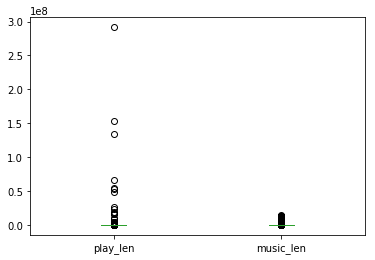

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

df[ ['play_len', 'music_len'] ].plot.box()

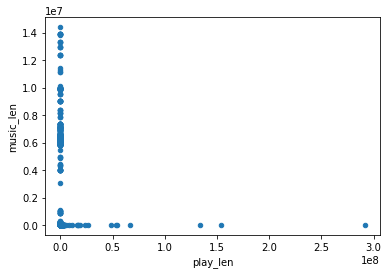

In [29]:
df.plot.scatter(x='play_len', y='music_len');

In [30]:
# find outlier
print(df['play_len'].quantile([0.025, 0.975]))
print(df['music_len'].quantile([0.025, 0.975]))

0.025       0.0
0.975    2157.0
Name: play_len, dtype: float64
0.025      0.0
0.975    494.0
Name: music_len, dtype: float64


In [31]:
# just for visualize relationship between play_len and music_len
df['long_play'] = df['play_len'] > 10000
df['long_music'] = df['music_len'] > 6000

In [32]:
df_normal = df[(df['long_play'] == False) & (df['long_music'] == False) ]


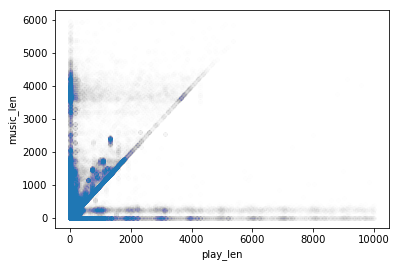

In [33]:
df_normal.plot.scatter(x='play_len', y='music_len', alpha = 0.005);

In [34]:
# define new column long_play and long-music
df['long_play'] = df['play_len'] > 1800
df['long_music'] = df['music_len'] > 1800

In [35]:
df_normal2 = df[(df['long_play'] == False) & (df['long_music'] == False) ]


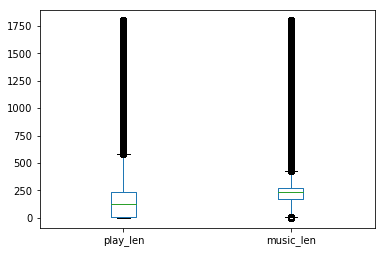

In [36]:
df_normal2[ ['play_len', 'music_len'] ].plot.box()

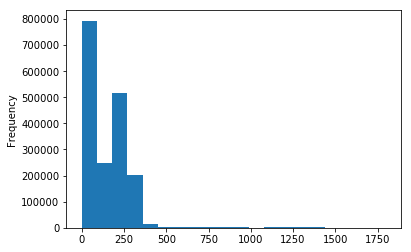

In [37]:
df_normal2['play_len'].plot.hist(bins = 20)

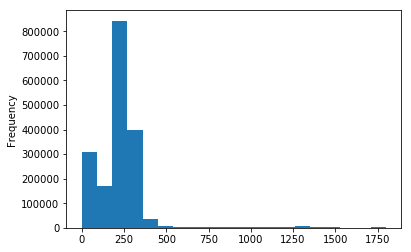

In [38]:
df_normal2['music_len'].plot.hist(bins = 20)

In [39]:
df['pay'].unique()

array([0.0, 415.0, 252.0, '0 ', ' '], dtype=object)

In [40]:
df['pay'] = df['pay'].apply(pd.to_numeric, errors = 'coerce')

In [41]:
df.loc[~( (df['pay'] == 1) | (df['pay'] == 0) ), 'pay'] = -1

In [42]:
# check NAs
dfNull = df.isnull()
print( dfNull.sum(axis=0) )

user_id       0
user_os       0
music_id      0
music_type    0
music_name    0
singer        0
play_len      0
music_len     0
pay           0
long_play     0
long_music    0
dtype: int64


In [43]:
df['music_type'].unique()

array(['0 ', '2 ', '1 ', ' ', '0(110.52.39.42)TM ', '1(222.172.183.77)TM ',
       '3 ', '1(39.187.201.186)TM ', '(111.2.103.196)TM ',
       '(111.19.78.218)TM ', '(39.174.74.62)TM ', '1(39.174.74.62)TM ',
       '(61.166.185.227)TM ', '0(112.11.2.204)TM ', '0(39.188.137.197)TM ',
       '(39.174.73.42)TM ', '0(39.174.72.84)TM ', '(39.187.201.133)TM ',
       '(112.11.192.50)TM ', '2(221.13.1.131)TM ', '0(223.95.240.212)TM ',
       '0(39.189.229.9)TM ', '(112.12.123.132)TM ', '(39.183.145.67)TM ',
       '0(112.112.124.163)TM ', '(182.243.38.151)TM ',
       '(39.187.200.41)TM ', '0(39.187.201.183)TM ', '0(39.191.0.152)TM ',
       '0(111.19.112.144)TM ', '(114.106.26.149)TM ', '(114.104.22.89)TM ',
       '0(112.117.189.19)TM ', '0(39.183.144.253)TM ',
       '1(182.246.48.244)TM ', '(221.209.217.112)TM ', '(39.191.0.152)TM ',
       '(117.148.117.241)TM ', '0(183.198.244.196)TM ',
       '1(117.148.117.241)TM ', '0(112.11.85.143)TM ',
       '0(223.95.49.177)TM ', '(112.11.2.204)TM

In [44]:
# clean music_type
df['music_type'] = df['music_type'].str.replace('(\d+[.]\d+[.]\d+[.]\d+)', '') # remove e.g.: 124.166.255.76 
df['music_type'] = df['music_type'].str.replace('([TM])', '') # remove e.g.: TM
df['music_type'] = df['music_type'].str.replace('([\>|\(|\)|\=\}])','') # remove > or ( or ) or = or }
df['music_type'] = df['music_type'].str.replace('(\s+)', '') # remove space
df['music_type'] = df['music_type'].str.replace('(\x0f)', '') # remove space

In [45]:
df['music_type'].unique()

array(['0', '2', '1', '', '3'], dtype=object)

In [46]:
df['music_type'] = df['music_type'].apply(pd.to_numeric)

In [47]:
# check NAs
dfNull = df.isnull()
print( dfNull.sum(axis=0) )

user_id          0
user_os          0
music_id         0
music_type    7953
music_name       0
singer           0
play_len         0
music_len        0
pay              0
long_play        0
long_music       0
dtype: int64


In [48]:
df = df.fillna(-1)

In [49]:
# check NAs
dfNull = df.isnull()
print( dfNull.sum(axis=0) )

user_id       0
user_os       0
music_id      0
music_type    0
music_name    0
singer        0
play_len      0
music_len     0
pay           0
long_play     0
long_music    0
dtype: int64


In [50]:
df['user_id'] = df['user_id'].apply(pd.to_numeric)

In [51]:
# check NAs
dfNull = df.isnull()
print( dfNull.sum(axis=0) )

user_id       0
user_os       0
music_id      0
music_type    0
music_name    0
singer        0
play_len      0
music_len     0
pay           0
long_play     0
long_music    0
dtype: int64


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852479 entries, 0 to 1846495
Data columns (total 11 columns):
user_id       int64
user_os       object
music_id      object
music_type    float64
music_name    object
singer        object
play_len      float64
music_len     float64
pay           float64
long_play     bool
long_music    bool
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 144.9+ MB


In [53]:
df['user_os'].unique()

array(['ar ', 'ip '], dtype=object)

In [54]:
df.to_csv('0303_c1.csv', index=False)